In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# # install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null row
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
# Overview of the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

All of the features contain only numerical data.

In [6]:
# Unique koi dispositions
df["koi_disposition"].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

As there are three outcomes to predict, we can't use logistic regression.

## Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
# Assign X (data) and y (target)
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

In [10]:
# Transform the training and testing data using the X_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Select your features (columns)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

In [12]:
# Remove all features that are either one or zero (on or off) in more than 80% of the samples

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X_train_scaled)

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [0., 0.],
       [0., 1.]])

In [13]:
sel.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

SelectFromModel will select features whose importance is greater than the mean importance of all the features by default.

In [14]:
selected_feat_names= X_train.columns[(sel.get_support())]
print(selected_feat_names)

Index(['koi_fpflag_ss', 'koi_fpflag_co'], dtype='object')


In [15]:
len(selected_feat_names)

2

In [ ]:
# # Set features. This will also be used as your x values.
# selected_features = df[selected_feat.to_list()]
# selected_features.head()

In [ ]:
# from sklearn.feature_selection import RFE

In [ ]:
# selector = RFE(rf, n_features_to_select=5, step=1)
# selector = selector.fit(X, y)
# selector.support_

In [ ]:
# Calculate feature importance and sort the features by their importance 
# sorted(zip(selector.ranking_, feature_names))

In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import RFE

# svm = LinearSVC()
# # create the RFE model for the svm classifier 
# # and select attributes
# rfe = RFE(svm, 3)
# rfe = rfe.fit(dataset.data, dataset.target)
# # print summaries for the selection of attributes
# print(rfe.support_)
# print(rfe.ranking_)

# Train the Model



In [ ]:
# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

k: 1, Train/Test Score: 1.000/0.790
k: 3, Train/Test Score: 0.897/0.811
k: 5, Train/Test Score: 0.878/0.820
k: 7, Train/Test Score: 0.866/0.823
k: 9, Train/Test Score: 0.856/0.828
k: 11, Train/Test Score: 0.848/0.828
k: 13, Train/Test Score: 0.849/0.822
k: 15, Train/Test Score: 0.841/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 19, Train/Test Score: 0.836/0.824


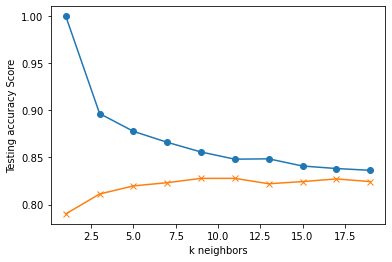

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o', label="Training Scores") #
plt.plot(range(1, 20, 2), test_scores, marker="x", label="Testing Scores") #Start low, and get not much better after k=5
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# k = 9 seems to be the best choice
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.828


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)